<a href="https://colab.research.google.com/github/yinglilim/LIMYINGLI-/blob/main/Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cardio Disease Prediction Using Machine Learning**

# **Introduction**

**Cardio disease or in other words known as cardiovascular disease (CVD)** is a general term for conditions affecting the heart or blood vessels. It's usually associated with a build-up of fat deposite inside the arteries (atherosclerosis) and an increased risk of blood clots. It can also be associated with damage to arteries in organs such as brain, heart, kidneys and eyes. CVD is one of the main causes of death and disability but it can often largely be prevented by leading a healthy lifetsyle. In short, there are several types of CVD including coronary heart disease, stroke, peripheral arterial disease, cerebrovascular disease, rheumatic heart disease, cogenital heart disease, deep vein thrombosis, aortic disease and pulmonary embolism. Also, there are several causes of CVD including high blood pressure, smoking, high cholesterol, diabetes, inactivity, obesity, family history of CVD, ethnic background and other risk factors. 
(Source: https://www.nhs.uk/conditions/cardiovascular-disease/)

Cardiovascular Disease (CDV) are the leading cause of death globally. According to World Health Organization (WHO), an estimated 17.9 million people died from CVDs in 2019, representing 32% of all global deaths. Of these deaths, 85% were due to heart attack and stroke. Over three quaters of CVD deaths take place in low and middle income countries. Out of the 17 million premature deaths (under the age of 70) due to non-communicable diseases in 2019, 38% were caused by CVDs.

In Malaysia, according to latest WHO data published in 2018 Coronay Cardiovascular Disease Deaths reached 34,766 or 24.69% of total deaths and ranked Malaysia 64th in the world.
(Source: https://bit.ly/3nppEQd)


**Data analytics and machine learning** play an important role in studying huge datasets to find hidden trends or information from the data and predict outcomes accordingly. It can be defined as a practice of using algorithms to extract data, learn from it, and then forecast future trends for that topic. Traditional machine learning software is statistical analysis and predictive analysis that is used to spot patterns and catch hidden insights based on perceived data. 


In this project, we have proposed a few cardio disease prediction models and compare their accuracy for better classification of cardio diseases based on a few external factors including ages (days & years), gender, height, weight, blood pressure (systolic & diastolic), cholesterol, glucose, smoking, alcohol consumption and active level.


For this machine learning project, we choose a dataset from the **medical domain**, cardio disease. We used 3 different machine learning models to **predict the chances or possibilities of the patients in getting cardio disease or not** by interpreting the variables given. 

Steps:
1. Import Necessary Libraries
2. Read In and Explore the Data
3. Data Analysis
4. Data Cleaning
5. Data Visualization
6. Choosing the Best Model
7. Discussion
8. Conclusion

# **1. Import Necessary Libraries**
At first, we import necessary libraries such as pandas, numpy and seaborn.

In [3]:
import pandas as pd
import pandas_profiling
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Then, we upload the dataset from data.csv

In [4]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


Upload widget is only available when the cell has been executed in the current browser session. Please rerun this cell to enable.

# **2. Read in and Explore the Data**
After uploading the file, the training and testing data is read using pd.read_csv.

In [5]:
df = pd.read_csv('data.csv')

Then, describe function df is used to give the overall of the training data.

In [6]:
df

,id,age_days,age_year,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,47.873973,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,52.712329,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,61.920548,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,52.235616,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,61.454795,1,163,72.0,135,80,1,2,0,0,0,1


Dataset: Dataset of cardio disease take from https://www.kaggle.com/raminhashimzade/cardio-disease

**Datasset Description from the Dataset**

*   id number
*   age in days
*   age in years
*   gender (1 - women, 2 - men)
*   height cm
*   weight kg
*   ap_hi (Systolic blood pressure)
*   ap_lo (Diastolic blood pressure)
*   cholesterol (1: normal, 2: above normal, 3: well above normal)
*   gluc (1: normal, 2: above normal, 3: well above normal)
*   smoke (whether patient smokes or not(0 = no, 1 = yes))
*   alco Binary feature (0 = no, 1 = yes)
*   active Binary feature (0 = passive life, 1 = active life)
*   cardio Target variable(0 = no, 1 = yes)

In [7]:
#Looks for basic statistical details
df.describe(include="all")

,id,age_days,age_year,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,53.339358,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,6.759594,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,29.583562,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,48.394521,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,53.980822,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,58.430137,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,64.967123,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


1. **ap_hi:** From the dataset, there are about 25% of the patients have systolic blood pressure higher than 140.
2. **ap_lo:** According to the dataset, there are 25% of the patients have diastolic blood pressure lower than 90.

3. **Cholesterol:** According to the dataset, the average of cholesterol level is 1.4. 
4. **Glu:** From the dataset, there are at least 75% of patient have normal blood glucose level. 

**NOte:** This is an balance dataset since the mean for the 'Cardio' (outcome) is 0.5. The data is normal distributed througout the population. 

# **3. Data Analysis**
Now, we are analysing the variables in the data set.

In [8]:
# To check the data type for each variables of the columm.
df.dtypes

id               int64
age_days         int64
age_year       float64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

There are two float64 and twelve int64 in our data set. Discrete variables are in int type whereas continuous variables are in float type

Numerical variables: id(discrete), age_days(discrete), age_years(continuous), gender(discrete), height(discrete), weight(continous), ap_hi(discrete), ap_lo(discrete), cholesterol(discrete), glu(discrete), smok(discrete), alco(discrete), active(discrete), cardio(discrete)

In [9]:
print(df.columns)

Index(['id', 'age_days', 'age_year', 'gender', 'height', 'weight', 'ap_hi',
       'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')


In [10]:
# Check for any other unusable values
print(pd.isnull(df).sum())

id             0
age_days       0
age_year       0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


From the outcome, the dataset is complete and no cleaning process is required. However, we noticed that id is the identity number of the patient which has no relation with the cardio disesase

In [11]:
# Now, we drop id column which is unrelevant to our machine learning.
R= df.drop(['id'],axis=1)

In [12]:
print(R.shape)

(70000, 13)


Now, we have 70000 row and 13 column.

In [13]:
R

,age_days,age_year,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,47.873973,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,52.712329,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,61.920548,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,52.235616,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,61.454795,1,163,72.0,135,80,1,2,0,0,0,1


In [14]:
# To check count on number of non-zero values in each column.
print("Attributes    Number of non-Zeroes")
R.astype(bool).sum(axis=0)

Attributes    Number of non-Zeroes


age_days       70000
age_year       70000
gender         70000
height         70000
weight         70000
ap_hi          70000
ap_lo          69979
cholesterol    70000
gluc           70000
smoke           6169
alco            3764
active         56261
cardio         34979
dtype: int64

In [ ]:
# For better presentation, dispay aslo the count on number of zeroes in each column. 
print("Attributes       Number of Zeroes (out of 70000)")
(R == 0).astype(int).sum(axis=0)

Attributes       Number of Zeroes (out of 70000)


age_days           0
age_year           0
gender             0
height             0
weight             0
ap_hi              0
ap_lo             21
cholesterol        0
gluc               0
smoke          63831
alco           66236
active         13739
cardio         35021
dtype: int64

The number of zeroes and non zeros are normal except for ap_lo. It is imposible for the diastolic blood pressure to be zero.

# 4. **Data Cleaning**

## **ap_lo**

There are 21 row of ap_lo are zeroes. Therefore, we decided to drop the whole row if 'ap_low' = 0

In [15]:
R = R[R.ap_lo   != 0]

In [16]:
R.describe(include="all")

,age_days,age_year,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69979.000000,69979.000000,69979.000000,69979.000000,69979.000000,69979.000000,69979.000000,69979.000000,69979.000000,69979.000000,69979.000000,69979.000000,69979.000000
mean,19468.925049,53.339521,1.349533,164.359208,74.207567,128.752483,96.659412,1.366896,1.226497,0.088126,0.053773,0.803698,0.499764
std,2467.154212,6.759327,0.476826,8.210215,14.395255,153.870138,188.493373,0.680264,0.572304,0.283481,0.225571,0.397202,0.500004
min,10798.000000,29.583562,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,48.394521,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,53.980822,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,58.430137,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,64.967123,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Well, now 'ap_lo' minimum value is no longer zero. 

To check any outliers since the maximun value and minimun value are too high and too low.

In [17]:
temp_R = R.drop(['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active'], axis=1)

In [18]:
# calculating IQR (difference between 75% and 25% quantile)
Q1= temp_R. quantile(0.25)
Q3= temp_R.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age_days    3663.000000
age_year      10.035616
height        11.000000
weight        17.000000
ap_hi         20.000000
ap_lo         10.000000
cardio         1.000000
dtype: float64


In [19]:
# Finding out outliers (rows with "extreme" values)
temp_outliers = temp_R[((temp_R > Q3 + 1.5*IQR) | (temp_R < Q1 - 1.5*IQR)).any (axis=1)]

In [20]:
#print the outliers
print(temp_outliers.index) 

Int64Index([    4,     9,    15,    23,    43,    50,    56,    59,    61,
               62,
            ...
            69929, 69932, 69937, 69946, 69947, 69967, 69978, 69981, 69996,
            69997],
           dtype='int64', length=7477)


In [21]:
# Print the outliers for each column
temp_outliers

,age_days,age_year,height,weight,ap_hi,ap_lo,cardio
4,17474,47.873973,156,56.0,100,60,0
9,19834,54.339726,164,68.0,110,60,0
15,16782,45.978082,172,112.0,120,80,1
23,23376,64.043836,156,45.0,110,60,0
43,20556,56.317808,159,63.0,120,60,1
...,...,...,...,...,...,...,...
69967,21416,58.673973,168,63.0,140,1000,1
69978,18800,51.506849,163,78.0,90,60,1
69981,17500,47.945205,182,110.0,130,90,1
69996,22601,61.920548,158,126.0,140,90,1


In [22]:
# remove outliers from other data
R = R.drop(temp_outliers.index)

In [23]:
R

,age_days,age_year,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
5,21914,60.038356,1,151,67.0,120,80,2,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,19699,53.969863,1,172,70.0,130,90,1,1,0,0,1,1
69994,21074,57.736986,1,165,80.0,150,80,1,1,0,0,1,1
69995,19240,52.712329,2,168,76.0,120,80,1,1,1,0,1,0
69998,22431,61.454795,1,163,72.0,135,80,1,2,0,0,0,1


We are done for data cleaning. 

# 5. Data Visualization

**Some assumptions are made:**




*   The height, and gender of the patients will not affect the chance of having cardio disease. 
*   The patients with higher age_days and age_years will have a higer chance of getting cardio disease. 


*   The patients with higher weight will have higher chance of getting cardio disease. 

*  The patients with higher diastolic blood pressure and  will have higher chance of getting cardio disease. 
*   The patients with high systolic blood pressure will have higher chance of getting cardio disease. 

*   The patients with higher score for smoke, alcohol and cholesterol will have a higher chance of getting cardio diesase




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

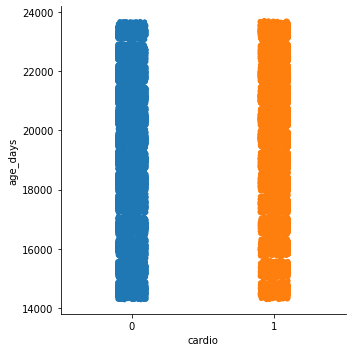

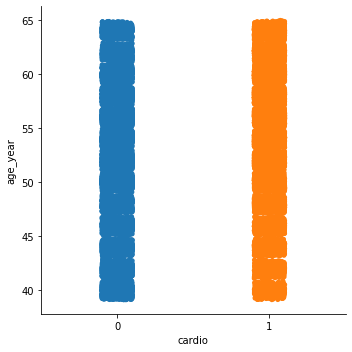

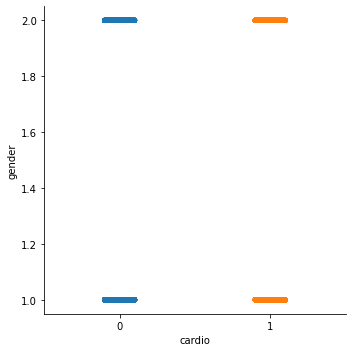

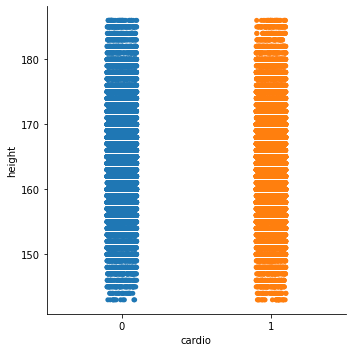

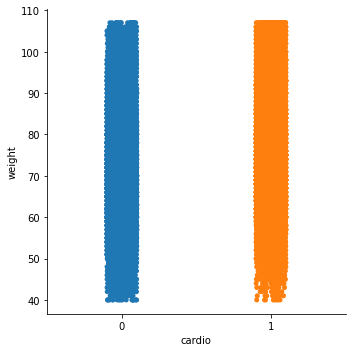

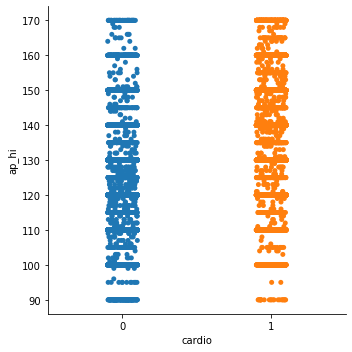

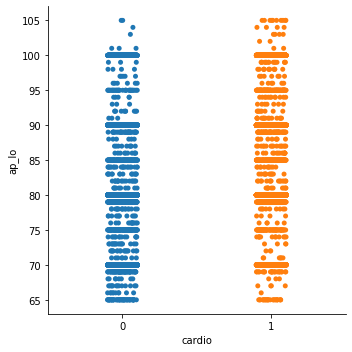

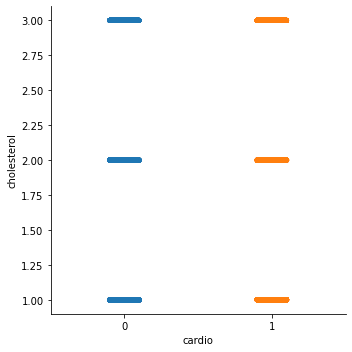

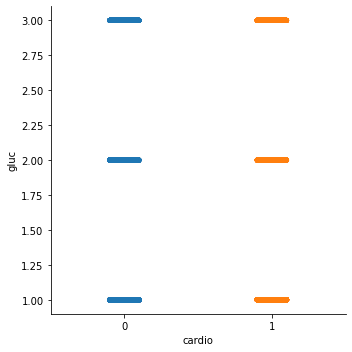

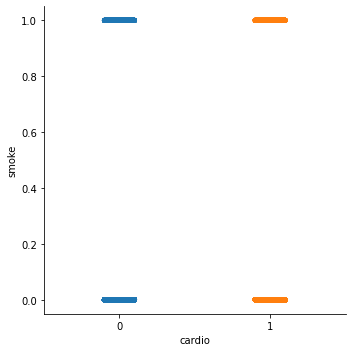

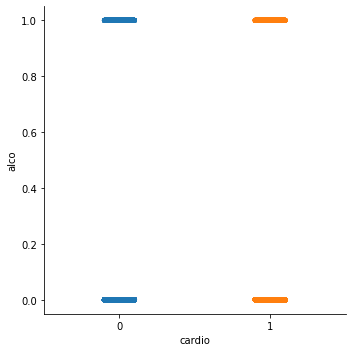

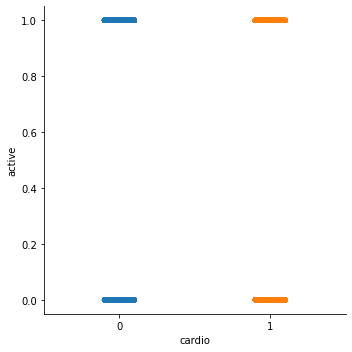

In [25]:
#Data is visualize to check the overview of the data set. 
for col in R.columns:
  if col != "cardio":
      sns.catplot("cardio", col, data = R)

# **6. Choosing the best model**

**Testing Different Models**
 
 We will be testing the folloiwng models with our training data: 
 

*   KNN 0r Nearest Neighbors
*   Decision Tree Classifier
*   Random Forest Classifier

Now, we split the dataset into training and test set. 

In [102]:
X= R.drop(['cardio'],axis=1)

In [103]:
X

,age_days,age_year,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,18393,50.391781,2,168,62.0,110,80,1,1,0,0,1
1,20228,55.419178,1,156,85.0,140,90,3,1,0,0,1
2,18857,51.663014,1,165,64.0,130,70,3,1,0,0,0
3,17623,48.282192,2,169,82.0,150,100,1,1,0,0,1
5,21914,60.038356,1,151,67.0,120,80,2,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69993,19699,53.969863,1,172,70.0,130,90,1,1,0,0,1
69994,21074,57.736986,1,165,80.0,150,80,1,1,0,0,1
69995,19240,52.712329,2,168,76.0,120,80,1,1,1,0,1
69998,22431,61.454795,1,163,72.0,135,80,1,2,0,0,0


In [ ]:
y=R['cardio']

In [ ]:
y

0        0
1        1
2        1
3        1
5        0
        ..
69993    1
69994    1
69995    0
69998    1
69999    0
Name: cardio, Length: 62502, dtype: int64

In [ ]:
#Import Module
# We create our training and testing datasets with a train_test_split method
# At the moment train set size will be 80% of the data and test set size 20%
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split


train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    random_state=122)

In [ ]:
train_X.shape, test_X.shape

((50001, 12), (12501, 12))

The training set consists of 1577 rows, while the test set consists of 395 rows.The ratio of training set: test set is 8:2.

In [ ]:
train_X

,age_days,age_year,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
63637,18113,49.624658,2,172,86.0,140,90,1,1,0,0,1
53813,15222,41.704110,1,164,73.0,120,90,1,2,0,0,1
36944,20653,56.583562,2,172,84.0,120,80,1,1,0,0,1
39041,19938,54.624658,1,162,63.0,120,80,1,1,0,0,1
42399,19857,54.402740,1,174,94.0,120,80,2,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
17488,22010,60.301370,1,156,54.0,130,80,1,1,0,0,1
13611,15239,41.750685,1,168,69.0,120,80,1,1,0,0,1
2740,22098,60.542466,2,159,61.0,120,80,1,1,0,0,1
36562,15962,43.731507,1,159,74.0,120,80,1,1,0,0,1


In [ ]:
test_X

,age_days,age_year,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
32433,22768,62.378082,2,179,85.0,140,90,3,1,0,0,1
29297,16666,45.660274,1,164,79.0,120,80,1,1,0,0,1
65402,17651,48.358904,1,156,65.0,130,85,1,1,0,0,1
43327,17259,47.284932,1,164,57.0,130,70,1,1,0,0,1
2730,21970,60.191781,1,160,66.0,150,100,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
43318,17273,47.323288,1,157,60.0,110,80,1,3,0,0,1
27000,15432,42.279452,2,170,85.0,120,80,1,1,0,0,1
28367,19660,53.863014,2,172,85.0,120,80,1,1,0,0,1
30997,19745,54.095890,1,162,106.0,140,90,1,3,0,0,1


In [ ]:
train_y.shape, test_y.shape

((50001,), (12501,))

In [ ]:
train_y

63637    1
53813    1
36944    0
39041    0
42399    0
        ..
17488    1
13611    0
2740     0
36562    0
45253    0
Name: cardio, Length: 50001, dtype: int64

In [ ]:
test_y

32433    1
29297    1
65402    1
43327    0
2730     1
        ..
43318    0
27000    0
28367    1
30997    1
33334    0
Name: cardio, Length: 12501, dtype: int64

# **KNN** (k-Nearest Neighbor)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#import metrics model to check the accuracy 
from sklearn import metrics

#Try running from k=1 through 100 and record testing accuracy
k_range = range(1,101)
scores = {}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(train_X, train_y)
    pred_1 = knn.predict(test_X)
    scores[k] = metrics.accuracy_score(test_y, pred_1)
    scores_list.append(metrics.accuracy_score(test_y, pred_1))

In [ ]:
print("-------------------------------")
print("k-value |     Test Accuracy")
print("-------------------------------")
for a,b in zip(k_range, scores_list):
  print(a, "\t|  ", b)
print("-------------------------------")

-------------------------------
k-value |     Test Accuracy
-------------------------------
1 	|   0.6258699304055676
2 	|   0.6311495080393569
3 	|   0.6611471082313415
4 	|   0.6676265898728102
5 	|   0.6789856811455084
6 	|   0.6807455403567715
7 	|   0.6826653867690585
8 	|   0.6887449004079673
9 	|   0.6916246700263979
10 	|   0.6929045676345892
11 	|   0.693384529237661
12 	|   0.6959443244540436
13 	|   0.6988240940724743
14 	|   0.6996240300775938
15 	|   0.6993840492760579
16 	|   0.7005839532837373
17 	|   0.700983921286297
18 	|   0.699144068474522
19 	|   0.699224062075034
20 	|   0.7009039276857851
21 	|   0.6997040236781058
22 	|   0.7007439404847612
23 	|   0.6995440364770819
24 	|   0.7005039596832253
25 	|   0.7016238700903927
26 	|   0.701143908487321
27 	|   0.7023438124950004
28 	|   0.70314374850012
29 	|   0.7039436845052396
30 	|   0.7021838252939765
31 	|   0.7025837932965363
32 	|   0.700983921286297
33 	|   0.7002639788816895
34 	|   0.7025037996960243
35 	|  

Text(0, 0.5, 'Testing Accuracy')

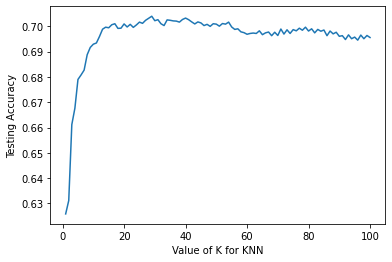

In [ ]:
#We plot the relationship between K and the testing accuracy
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [ ]:
max(scores_list)

0.7039436845052396

In [ ]:
for a,b in zip(k_range, scores_list):
  if b==0.7039436845052396:
    print(a)

29


From the result, we choose k = 29 since we opt to choose odd number with highest accuracy while excluding 1.

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 49)
knn.fit(train_X, train_y)

KNeighborsClassifier(n_neighbors=49)

In [ ]:
# We can ask the model to directly calculate the accuracy
knn.score(train_X, train_y)

0.7169656606867862

In [ ]:
knn.score(test_X,test_y)

0.700983921286297

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# We can also let the model predict the values for the test set
pred_1 = knn.predict(test_X)
print(pred_1[:10])

[1 0 0 0 1 1 0 0 1 1]


In [ ]:
# And calculate the accuracy
print("Accuracy:", accuracy_score(test_y, pred_1))

Accuracy: 0.700983921286297


In [ ]:
# the confusion matrix
print("Confusion matrix:")
print(confusion_matrix(test_y, pred_1))

Confusion matrix:
[[4889 1392]
 [2346 3874]]


KNN is not a god model for the prediction. It is acceptable to give wrong prediction of labelling a non-cardiac disease person has cardiac disease, however, labelling a cardiac disease person as non cardiac can have serious consequences. This may be due to an imbalanced dataset skewing towards non-cardiac.

Text(0.5, 257.44, 'Predicted label')

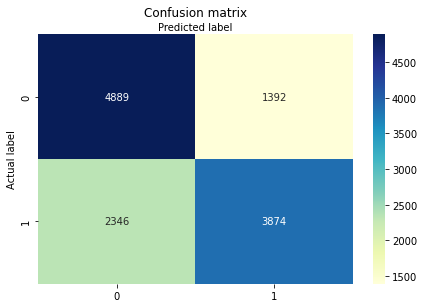

In [ ]:
cnf_matrix = metrics.confusion_matrix(test_y, pred_1)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**Note:** A confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class.

[[TN FP]

[FN TP]]

TP: True postive TN: True negative FP: False positive *FN: False Negative

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import roc_curve
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import auc, plot_precision_recall_curve
from sklearn import metrics

In [ ]:
dtc=DecisionTreeClassifier()

In [ ]:
dtc=dtc.fit(train_X,train_y)

In [ ]:
pred_2=dtc.predict(test_X)

In [ ]:
print(pred_2[:10])

[1 0 1 0 1 1 0 1 1 1]


In [ ]:
print("Accuracy:", accuracy_score(test_y, pred_2))

Accuracy: 0.6254699624030078


In [ ]:
# the confusion matrix
print("Confusion matrix:")
print(confusion_matrix(test_y, pred_2))

Confusion matrix:
[[3913 2368]
 [2314 3906]]


Text(0.5, 257.44, 'Predicted label')

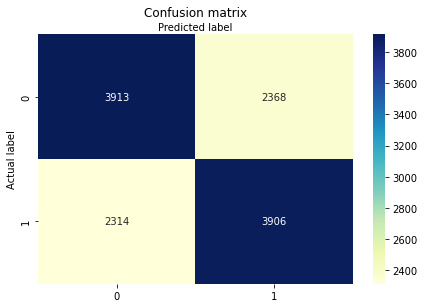

In [ ]:
cnf_matrix = metrics.confusion_matrix(test_y, pred_2)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
ran=RandomForestClassifier(n_estimators=100)

In [ ]:
ran.fit(train_X,train_y)

RandomForestClassifier()

In [ ]:
pred_4=ran.predict(test_X)

In [ ]:
print(pred_4[:10])

[1 0 0 0 1 1 0 1 1 1]


In [ ]:
print("Accuracy:", accuracy_score(test_y, pred_4))

Accuracy: 0.7077033837293016


In [ ]:
# the confusion matrix
print("Confusion matrix:")
print(confusion_matrix(test_y, pred_4))

Confusion matrix:
[[4578 1703]
 [1951 4269]]


Text(0.5, 257.44, 'Predicted label')

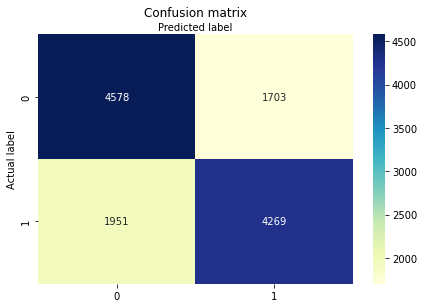

In [ ]:
cnf_matrix = metrics.confusion_matrix(test_y, pred_4)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Comparing the accuracy of three different models.

In [ ]:
 
models = pd.DataFrame({
    'Model': [ 'KNN', 'Decision Tree', 'Random Forest'],
    'Accuracy': [accuracy_score(test_y, pred_1), accuracy_score(test_y, pred_2), accuracy_score(test_y, pred_4)]})
models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
2,Random Forest,0.707703
0,KNN,0.700984
1,Decision Tree,0.625470


To look for the correlation matrix

In [ ]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
   
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix', fontsize=15)
    plt.show()

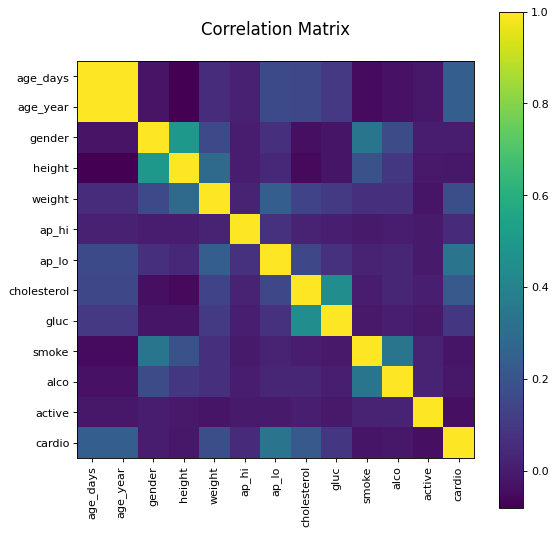

In [ ]:
plotCorrelationMatrix(R, 8)

# **7.Discussion**

## **Limitations**

Due to the limitation of datasets, we are unable to predict which types of Cardiovascular Disease (CVD) mentioned in above section such as coronary heart disease, stroke, peripheral arterial disease and so forth. 

## **Future Improvements**

Machine learning plays an important role in handling huge set of data. Data is the lifeblood of all business. Data-driven decisions increasingly make the difference between keeping up with competition or falling further behind. Machine learning allows software applications to become more accurate at predicting outcomes without being explicitly programmed to do so. Machine learning algorithms use historical data as input to predict new output values. For better accuracy of detection for cardio disease, the prediction can be carried out by combining machine learning and deep learning. By identifying and introducing the accurate prediction model, machine learning can help in creating more gadjets that useful in determining the patient status. Future improvements can be done by applying more machine learning in creating useful tool that can provide early detection and diagnosis showing the signs that the individuaks may suffer from cardio disease in later life. The tool from machine learning can also provide diet recommendation, activity involvement and life-style suggestions for the individuals to prevent from getting cardio disease. Future research and improvements should be done on improving the dataset. An outstanding research such as predicting the probability and duration for the non-cardio disease person to develop the disease in their later stages of life can also be carried out.

# **Comparison between Models**

The examples of models for supervised learning are decision tree, random forest and K-Nearest Neighbor (KNN). Supervised learning involves learning a function that maps an input to an output based on example input-output pairs (Stuart et al., 2010). 

**Decision tree** are a popular model, used in operations research, strategic planning, and machine learning. Each square above is called a node, and the more nodes you have, the more accurate your decision tree will be. The last nodes of the decision tree, where a decision is made, are called the leaves of the tree. Decision trees are intuitive and easy to build but fall short when it comes to accuracy.

**Random forest** is an ensemble learning technique that builds off of decision trees. Random forests involve creating multiple decision trees using bootstrapped datasets of the original data and randomly selecting a subset of variables at each step of the decision tree. 

**KNN** can be used for both classification and regression problems. However, it is more widely used in classification problems in the industry. KNN is a simple algorithm that stores all available cases and classifies new cases by a majority vote of its k neighbors. The case being assigned to the class is most common amongst its K nearest neighbors measured by a distance function.

Random Forest is more robust and accurate than decision trees. Decision tree supports automatic feature interaction, whereas KNN cant. Random forest has the highest accuracy among all the models. 

# **Deployment of Model**



Build a web application---Propose how the web apps can run and predict the model.
- Advantages of using web applications:

1) Web applications can run on multiple platforms regardless of OS or devide as long as the browser is compatible.

2) All users access the same version, eliminating any compatibility issues.

3) They are not installed on the hard drive, thus eliminating space limitations.

4) They reduce costs for both the business and end user as there is less support and manintainance required by the bysuness and lower requirements for the end user's computer.


Store data in SQL database--- popular, easy to learn, able to manage humongous amounts of data, provide client-server access, allow quick access to data, able to combine data from multiple sources

Store the data input by the users into another database---Follow up with that particular personnel. It is crucial to determine whether the outcome of getting the cardio disease after diagnosed by the doctor is similar to the one predicted by the model. Thus, the result collected from the follow up can be used to calculate percentage in order to determine the accuracy. This will indirectly monitor whether the moodel is performing as intended or failing to perform.
  





## **8. Conclusion**

In conclusion, random forest is the best model as it has the highest accuracy among KNN and decision tree. The accuracy of random forest is 0.707703 which is higher than KNN (0.700984) and decision tree (0.625470). Thus, people who have the possibility in getting cardio disease can be accurately predicted by using random forest model.